In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
from scipy.fftpack import fft,ifft

matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 6
matplotlib.rcParams['ytick.minor.size'] = 6
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['axes.labelpad'] = 8.0
matplotlib.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.close()

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
data1 = np.genfromtxt('data/plus1.dat')
t1=data1[:,0]
hp1=data1[:,1]
hpa=np.nan_to_num(hp1)
fft_hp1 = fft(hpa)
n1=len(t1)
T=t1[-1]/(n1-1)
xf1= np.linspace(0.0, 1.0/(2.0*T), n1//2)
ps1 = 2.0/n1 * np.abs(fft_hp1[0:n1//2])


data2 = np.genfromtxt('data/cross1.dat')
t2=data2[:,0]
hc2=data2[:,1]
hcb=np.nan_to_num(hc2)
fft_hp2 = fft(hcb)
n2=len(t2)
T=t2[-1]/(n2-1)
xf2= np.linspace(0.0, 1.0/(2.0*T), n2//2)
ps2 = 2.0/n2 * np.abs(fft_hp2[0:n2//2])


data3 = np.genfromtxt('data/plus2.dat')
t3=data3[:,0]
hp3=data3[:,1]
hpc=np.nan_to_num(hp3)
fft_hp3 = fft(hpc)
n3=len(t3)
T=t3[-1]/(n3-1)
xf3= np.linspace(0.0, 1.0/(2.0*T), n3//2)
ps3 = 2.0/n3 * np.abs(fft_hp3[0:n3//2])

data4 = np.genfromtxt('data/cross2.dat')
t4=data4[:,0]
hc4=data4[:,1]
hcd=np.nan_to_num(hc4)
fft_hp4 = fft(hcd)
n4=len(t4)
T=t4[-1]/(n4-1)
xf4= np.linspace(0.0, 1.0/(2.0*T), n4//2)
ps4 = 2.0/n4 * np.abs(fft_hp4[0:n4//2])

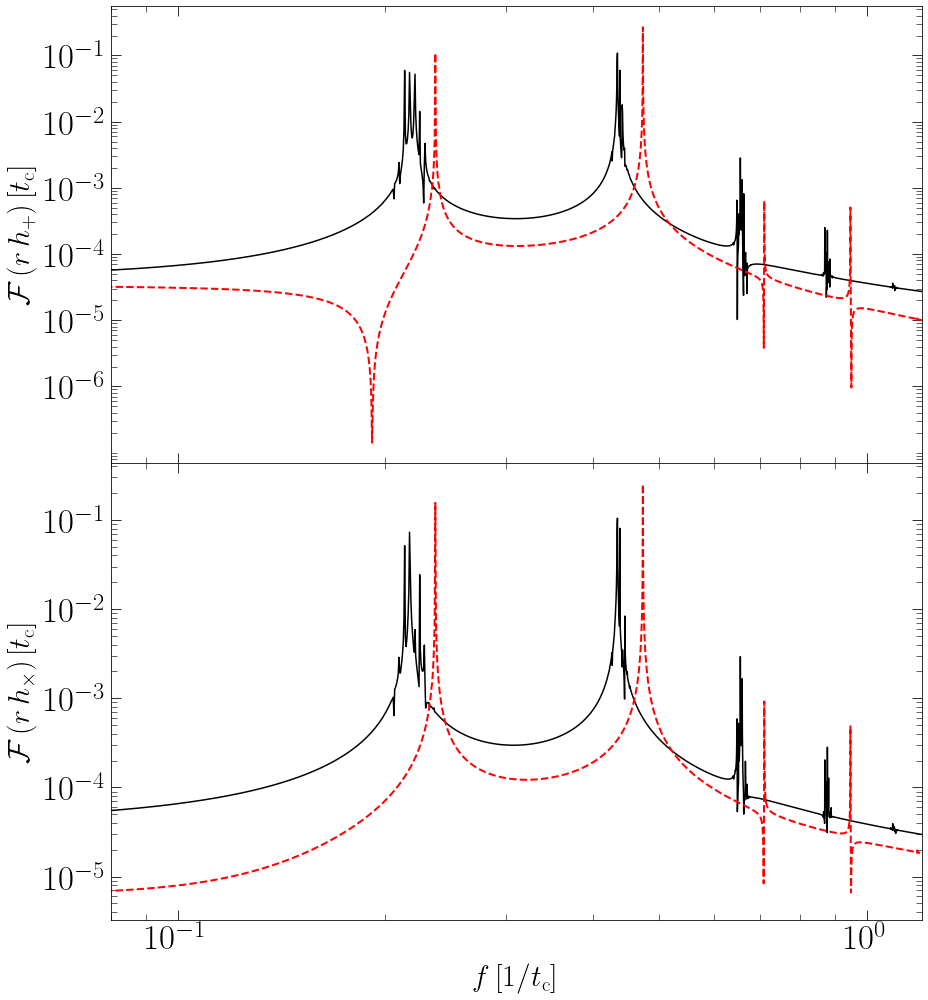

In [88]:
fig, (ax2, ax3) = plt.subplots(2, figsize=(13,14),sharex=True)
matplotlib.rcParams['xtick.labelsize'] = 35
matplotlib.rcParams['ytick.labelsize'] = 35




ax2.loglog(xf3, ps3, linewidth=1.5,color='k')
# ax2.set_xlabel(r'$\rm{f_{GW}\,[{Hz}]}$',fontsize=25)

# ax2.set_ylim(1*1e-30,7*1e-23)


ax2.loglog(xf1, ps1, linewidth=2,color='r',linestyle='--')
# ax2.set_xlabel(r'$\rm{f_{GW}\,[{Hz}]}$',fontsize=25)
ax2.set_ylabel(r'$\mathcal{F}\,(r\,h_{+})\,[t_{\rm c}]$',fontsize=30)
# ax2.set_ylim(1*1e-30,7*1e-23)
# ax2.set_yticks([1e-29,1e-27,1e-25,1e-23])
ax2.set_yticks([1e-6,1e-5,1e-4,1e-3, 1e-2,1e-1])
locmin = matplotlib.ticker.LogLocator(base=10,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


ax3.loglog(xf4, ps4,linewidth=1.5,color='k')
ax3.loglog(xf2, ps2,linewidth=2,color='r',linestyle='--')

ax3.set_xlabel(r'$f\,[1/t_{\rm c}]$',fontsize=30)
ax3.set_ylabel(r'$\mathcal{F}\,(r\,h_{\times})\,[t_{\rm c}]$',fontsize=30)
ax3.set_xlim(0.08,1.2)
# ax3.set_ylim(8.1e-6,7*1e-23)
# ax3.set_yticks([1e-29,1e-27,1e-25,1e-23])


plt.minorticks_on()
fig.tight_layout() 
plt.subplots_adjust(hspace=0)
plt.savefig("fft_gw.pdf", format='pdf', bbox_inches="tight")
with PdfPages('fft_gw.pdf') as pdf:
    pdf.savefig(fig)

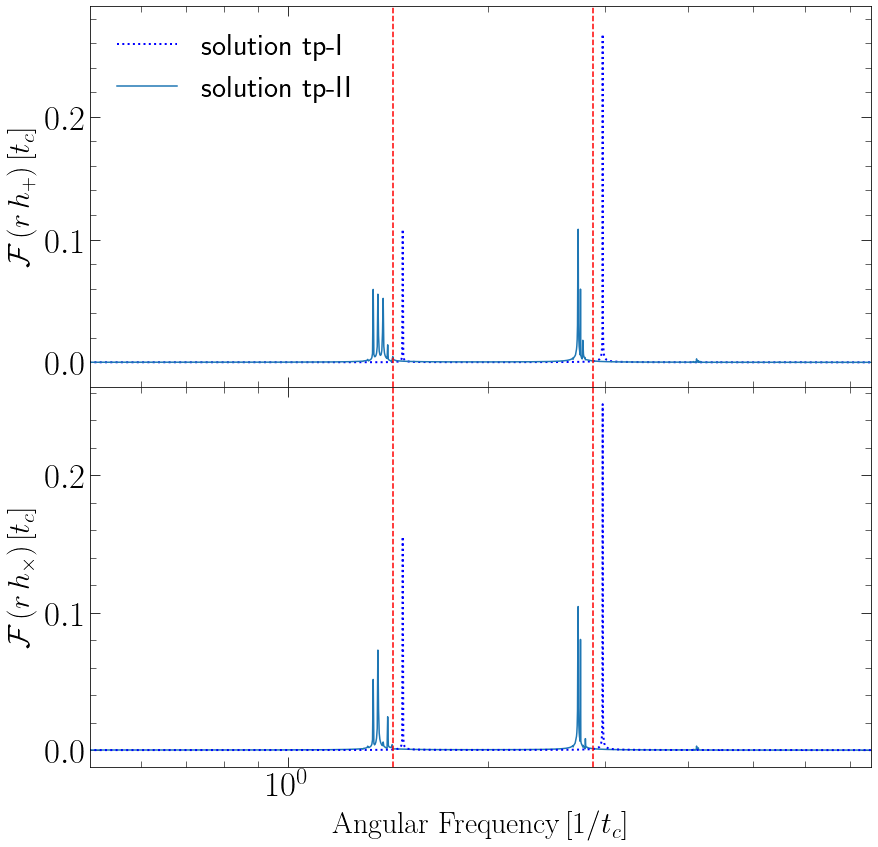

In [53]:
fig, (ax2, ax3) = plt.subplots(2, figsize=(14,14),sharex=True)
matplotlib.rcParams['xtick.labelsize'] = 35
matplotlib.rcParams['ytick.labelsize'] = 35

plt.subplots_adjust(hspace=0.0)

ax2.semilogx(2*np.pi*xf1, ps1, linewidth=2,color='b',linestyle='dotted',label='solution tp-I')
ax2.semilogx(2*np.pi*xf3, ps3, linewidth=1.5,color='tab:blue',label='solution tp-II')
# ax2.set_xlabel(r'$\rm{f_{GW}\,[{Hz}]}$',fontsize=25)

# ax2.set_ylim(1*1e-30,7*1e-23)



# ax2.set_xlabel(r'$\rm{f_{GW}\,[{Hz}]}$',fontsize=25)
ax2.set_ylabel(r'$\mathcal{F}\,(r\,h_{+})\,[t_{c}]$',fontsize=30)
# ax2.set_ylim(1*1e-30,7*1e-23)
# ax2.set_yticks([1e-29,1e-27,1e-25,1e-23])
# ax2.set_yticks([1e-6,1e-5,1e-4,1e-3, 1e-2,1e-1])
# locmin = matplotlib.ticker.LogLocator(base=10,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax2.yaxis.set_minor_locator(locmin)
# ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.axvline(x=1.438,color='r',linestyle='dashed')
ax2.axvline(x=2*1.438,color='r',linestyle='dashed')
ax2.set_ylim(-0.02,0.29)
ax2.yaxis.set_minor_locator(MultipleLocator(0.1/5))


ax3.semilogx(2*np.pi*xf4, ps4,linewidth=1.5,color='tab:blue')
ax3.semilogx(2*np.pi*xf2, ps2,linewidth=2,color='b',linestyle='dotted')

ax3.set_xlabel(r'$\rm Angular \ Frequency$\,$[1/t_c]$',fontsize=30)
ax3.set_ylabel(r'$\mathcal{F}\,(r\,h_{\times})\,[t_{c}]$',fontsize=30)
ax3.set_xlim(0.08*2*np.pi,1.2*2*np.pi)
# ax3.set_ylim(8.1e-6,7*1e-23)
# ax3.set_yticks([1e-29,1e-27,1e-25,1e-23])
ax3.axvline(x=1.438,color='r',linestyle='dashed')
ax3.axvline(x=2*1.438,color='r',linestyle='dashed')

plt.minorticks_on()
ax2.legend(fontsize=30, frameon=False,loc='upper left')
# fig.tight_layout() 
# plt.subplots_adjust(hspace=0)
plt.savefig("/Users/yonggao/Desktop/Project/lorentz_violation/gwfft.pdf", format='pdf', bbox_inches="tight")
# with PdfPages('fft_gw.pdf') as pdf:
#     pdf.savefig(fig)